# 2. Data Visualization
In this notebook we will use our extracted data and visualize it. For that purpose, we are importing function from our ```modules``` folder.

## 2.1 Libraries

We import the necessary libraries, including our own library in the modules file

In [1]:
# Warnings
import warnings
warnings.filterwarnings("ignore")

# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns
from scipy import stats
from functools import reduce

# Statsmodels
import statsmodels.api as sm
import pmdarima as pmd
from pmdarima.arima import auto_arima
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.var_model import VARResults
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

# Machine Learning models
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.linear_model import Ridge, Lasso, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_percentage_error,
    median_absolute_error,
    r2_score,
    precision_score

)

from xgboost import XGBRegressor

In [2]:
# We import our own functions
import sys
sys.path.append('../../..')  # Move two levels up to the project root
from modules.functions import *

## 2.2 Loading dataframe

In [3]:
df = pd.read_csv('../../../input/df_raw_h08.csv', parse_dates=['Fecha'], index_col='Fecha')
df.head()

,CPI,CPI Tradable,CPI Non-Tradable,CPI Core,CPI Non-Core,CPI Food and Energy,CPI Excluding Food and Energy,CPI Food and Beverages,CPI Excluding Food and Beverages,CPI Core Excluding Food and Beverages,...,Wholesale Price Index,Reserve Requirement Rate,Monetary Policy Rate,Circulating Currency Seasonally Adjusted (mill S/),Net International Reserves (mill $),Real Minimum Wage (Index),Wheat (US$ per ton),Corn (US$ per ton),Soybean oil (US$ per ton),Crude oil (US$ per barrel)
Fecha,,,,,,,,,,,,,,,,,,,,,
2003-10-01,0.495609,0.471092,0.512928,0.093421,1.082513,0.926523,-0.013523,0.996365,0.048218,0.030202,...,0.675723,10.349944,2.75,0.010225,0.005542,0.056953,0.016588,-0.027808,0.181232,0.065797
2003-11-01,0.468532,0.458591,0.475632,0.094738,1.013426,0.866951,-0.002180,0.917675,0.067534,0.031715,...,0.640840,11.690608,2.50,0.011445,0.050288,-0.001674,0.115205,0.075366,0.017022,0.022715
2003-12-01,0.441178,0.445053,0.438602,0.095937,0.943887,0.807104,0.008895,0.839410,0.085945,0.033198,...,0.604961,11.391178,2.50,0.016607,-0.010532,-0.005608,0.037146,0.048843,0.051254,0.037815
2004-01-01,0.413606,0.430631,0.401824,0.097020,0.874035,0.747053,0.019742,0.761551,0.103573,0.034709,...,0.568245,10.634030,2.50,0.019490,0.036233,-0.005346,0.003546,0.062558,0.026780,0.061517
2004-02-01,0.385898,0.415491,0.365316,0.097976,0.804075,0.686922,0.030393,0.684102,0.120567,0.036283,...,0.530890,10.718295,2.50,0.017003,-0.005743,-0.010744,-0.019994,0.081887,0.087963,0.015738


In [5]:
df_lags = pd.read_csv('../../../input/df_lags_h08.csv', parse_dates=['Fecha'], index_col='Fecha')
df_lags.head()

,CPI,CPI Tradable_lag_1,CPI Tradable_lag_2,CPI Non-Tradable_lag_1,CPI Non-Tradable_lag_2,CPI Core_lag_1,CPI Core_lag_2,CPI Non-Core_lag_1,CPI Non-Core_lag_2,CPI Food and Energy_lag_1,...,Real Minimum Wage (Index)_lag_1,Real Minimum Wage (Index)_lag_2,Wheat (US$ per ton)_lag_1,Wheat (US$ per ton)_lag_2,Corn (US$ per ton)_lag_1,Corn (US$ per ton)_lag_2,Soybean oil (US$ per ton)_lag_1,Soybean oil (US$ per ton)_lag_2,Crude oil (US$ per barrel)_lag_1,Crude oil (US$ per barrel)_lag_2
Fecha,,,,,,,,,,,,,,,,,,,,,
2003-12-01,0.441178,0.458591,0.471092,0.475632,0.512928,0.094738,0.093421,1.013426,1.082513,0.866951,...,-0.001674,0.056953,0.115205,0.016588,0.075366,-0.027808,0.017022,0.181232,0.022715,0.065797
2004-01-01,0.413606,0.445053,0.458591,0.438602,0.475632,0.095937,0.094738,0.943887,1.013426,0.807104,...,-0.005608,-0.001674,0.037146,0.115205,0.048843,0.075366,0.051254,0.017022,0.037815,0.022715
2004-02-01,0.385898,0.430631,0.445053,0.401824,0.438602,0.097020,0.095937,0.874035,0.943887,0.747053,...,-0.005346,-0.005608,0.003546,0.037146,0.062558,0.048843,0.026780,0.051254,0.061517,0.037815
2004-03-01,0.358128,0.415491,0.430631,0.365316,0.401824,0.097976,0.097020,0.804075,0.874035,0.686922,...,-0.010744,-0.005346,-0.019994,0.003546,0.081887,0.062558,0.087963,0.026780,0.015738,0.061517
2004-04-01,0.330259,0.399763,0.415491,0.329118,0.365316,0.098816,0.097976,0.734181,0.804075,0.626823,...,-0.004583,-0.010744,0.000571,-0.019994,0.073707,0.081887,0.047542,0.087963,0.058188,0.015738


## 2.3 Visualizing our data

We do a quick inspect in our data by plotting our input variables

In [6]:
len(df.columns)

21

In [7]:
# We select our input variables: all except CPI
df_variables = df.loc[:, ['CPI Tradable', 'CPI Non-Tradable', 'CPI Core', 'CPI Non-Core',
       'CPI Food and Energy', 'CPI Excluding Food and Energy',
       'CPI Food and Beverages', 'CPI Excluding Food and Beverages',
       'CPI Core Excluding Food and Beverages', 'CPI Imported',
       'Wholesale Price Index', 'Reserve Requirement Rate',
       'Monetary Policy Rate',
       'Circulating Currency Seasonally Adjusted (mill S/)',
       'Net International Reserves (mill $)', 'Real Minimum Wage (Index)',
       'Wheat (US$ per ton)', 'Corn  (US$ per ton)', 
       'Soybean oil (US$ per ton)', 'Crude oil (US$ per barrel)']]

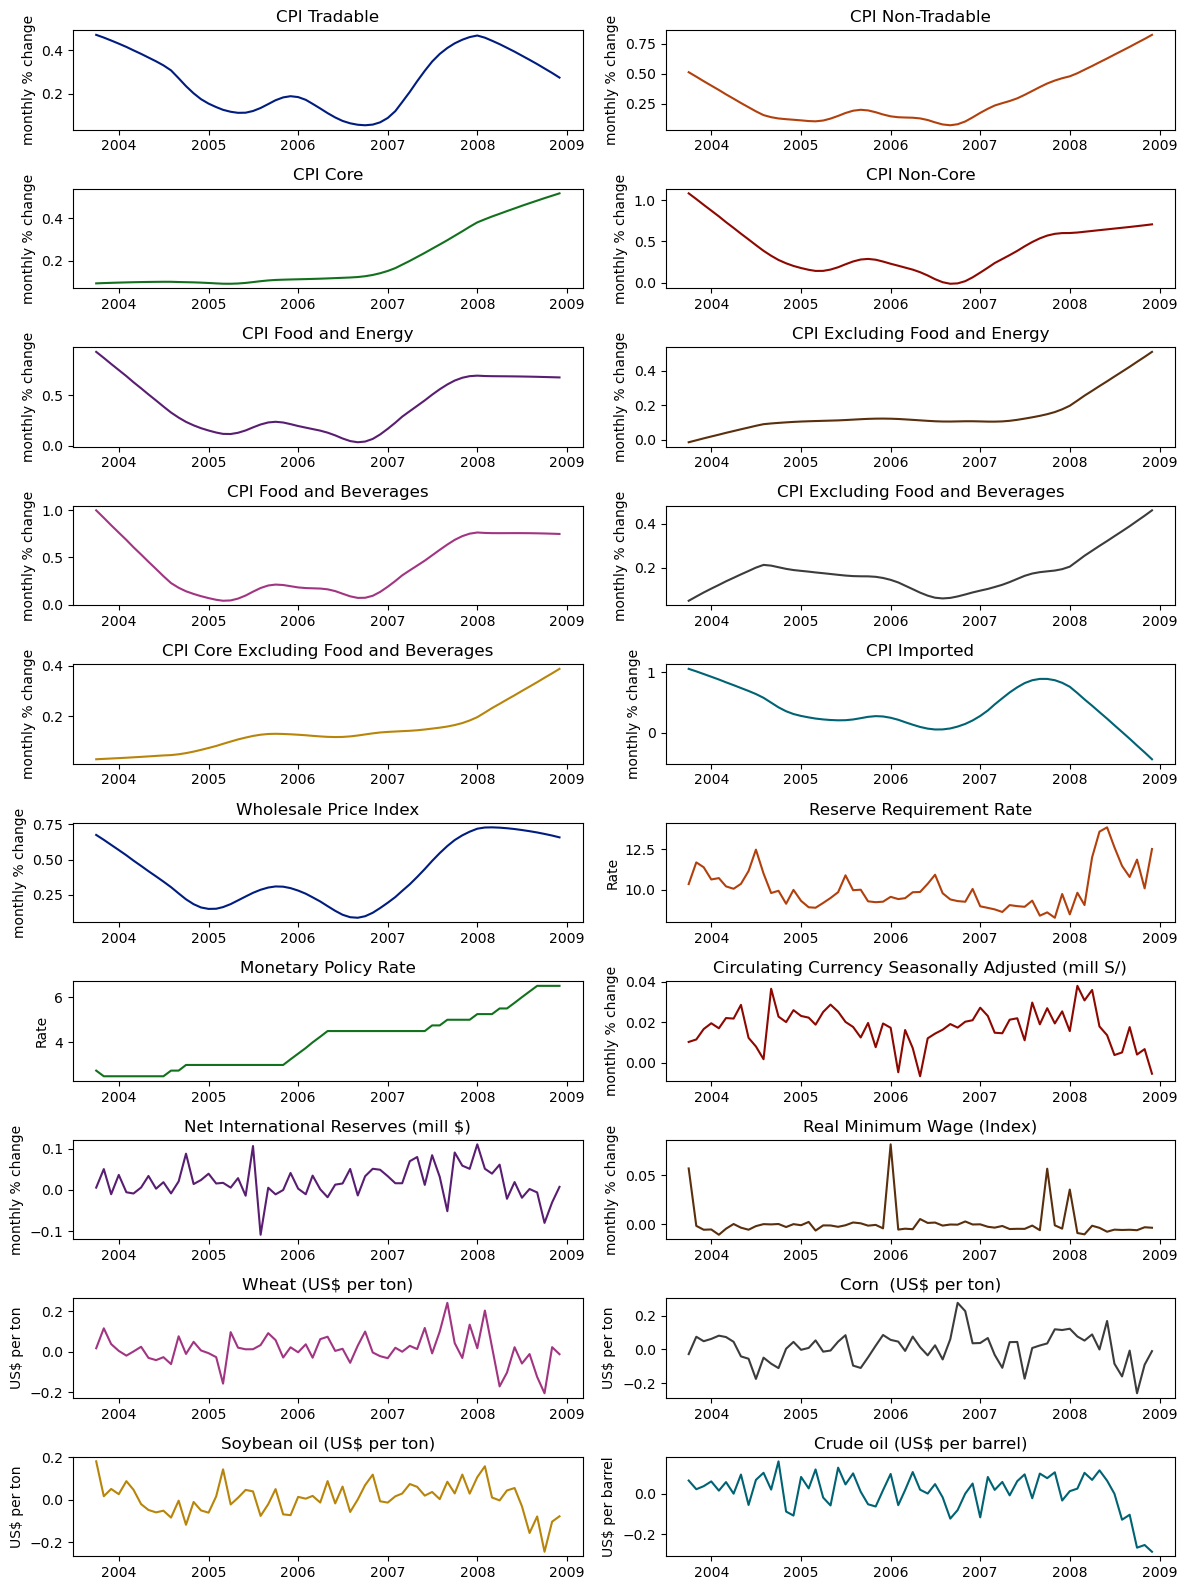

In [10]:
# Groups of variables
rate_columns = ["Reserve Requirement Rate", "Monetary Policy Rate"]
usd_per_ton_columns = ["Wheat (US$ per ton)", "Corn  (US$ per ton)", "Soybean oil (US$ per ton)"]
usd_per_barrel_columns = ["Crude oil (US$ per barrel)"]

fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(12, 16))

columns = df_variables.columns

colors = sns.color_palette("dark", n_colors=len(columns))

# We iterate over the rows and columns for each plot
for i in range(10):
    for j in range(2):
        index = i * 2 + j
        if index < len(columns):
            ax = axes[i, j]
            ax.plot(df.index, df[columns[index]], color=colors[index])
            ax.set_title(columns[index])
            if columns[index] in rate_columns:
                ax.set_ylabel('Rate')
            elif columns[index] in usd_per_ton_columns:
                ax.set_ylabel('US$ per ton')
            elif columns[index] in usd_per_barrel_columns:
                ax.set_ylabel('US$ per barrel')
            else:
                ax.set_ylabel('monthly % change')

plt.tight_layout()

plt.savefig('../../../output/2_DataVisualization/plot_variables_h08.png')
plt.show()

## 2.4 Getting correlations

First, we obtain the correlations between the Consumer Price Index (IPC) and all the variables

In [11]:
corr = df.corr()['CPI']
pd.DataFrame(corr)

,CPI
CPI,1.000000
CPI Tradable,0.864014
CPI Non-Tradable,0.972500
CPI Core,0.808394
CPI Non-Core,0.895632
CPI Food and Energy,0.954762
CPI Excluding Food and Energy,0.610572
CPI Food and Beverages,0.963207
CPI Excluding Food and Beverages,0.673240
CPI Core Excluding Food and Beverages,0.593949


Then, we obtain the correlations between the Core Consumer Price Index (IPC Alimentos y Energía) and all the variables

## 2.5 Visualizing correlations

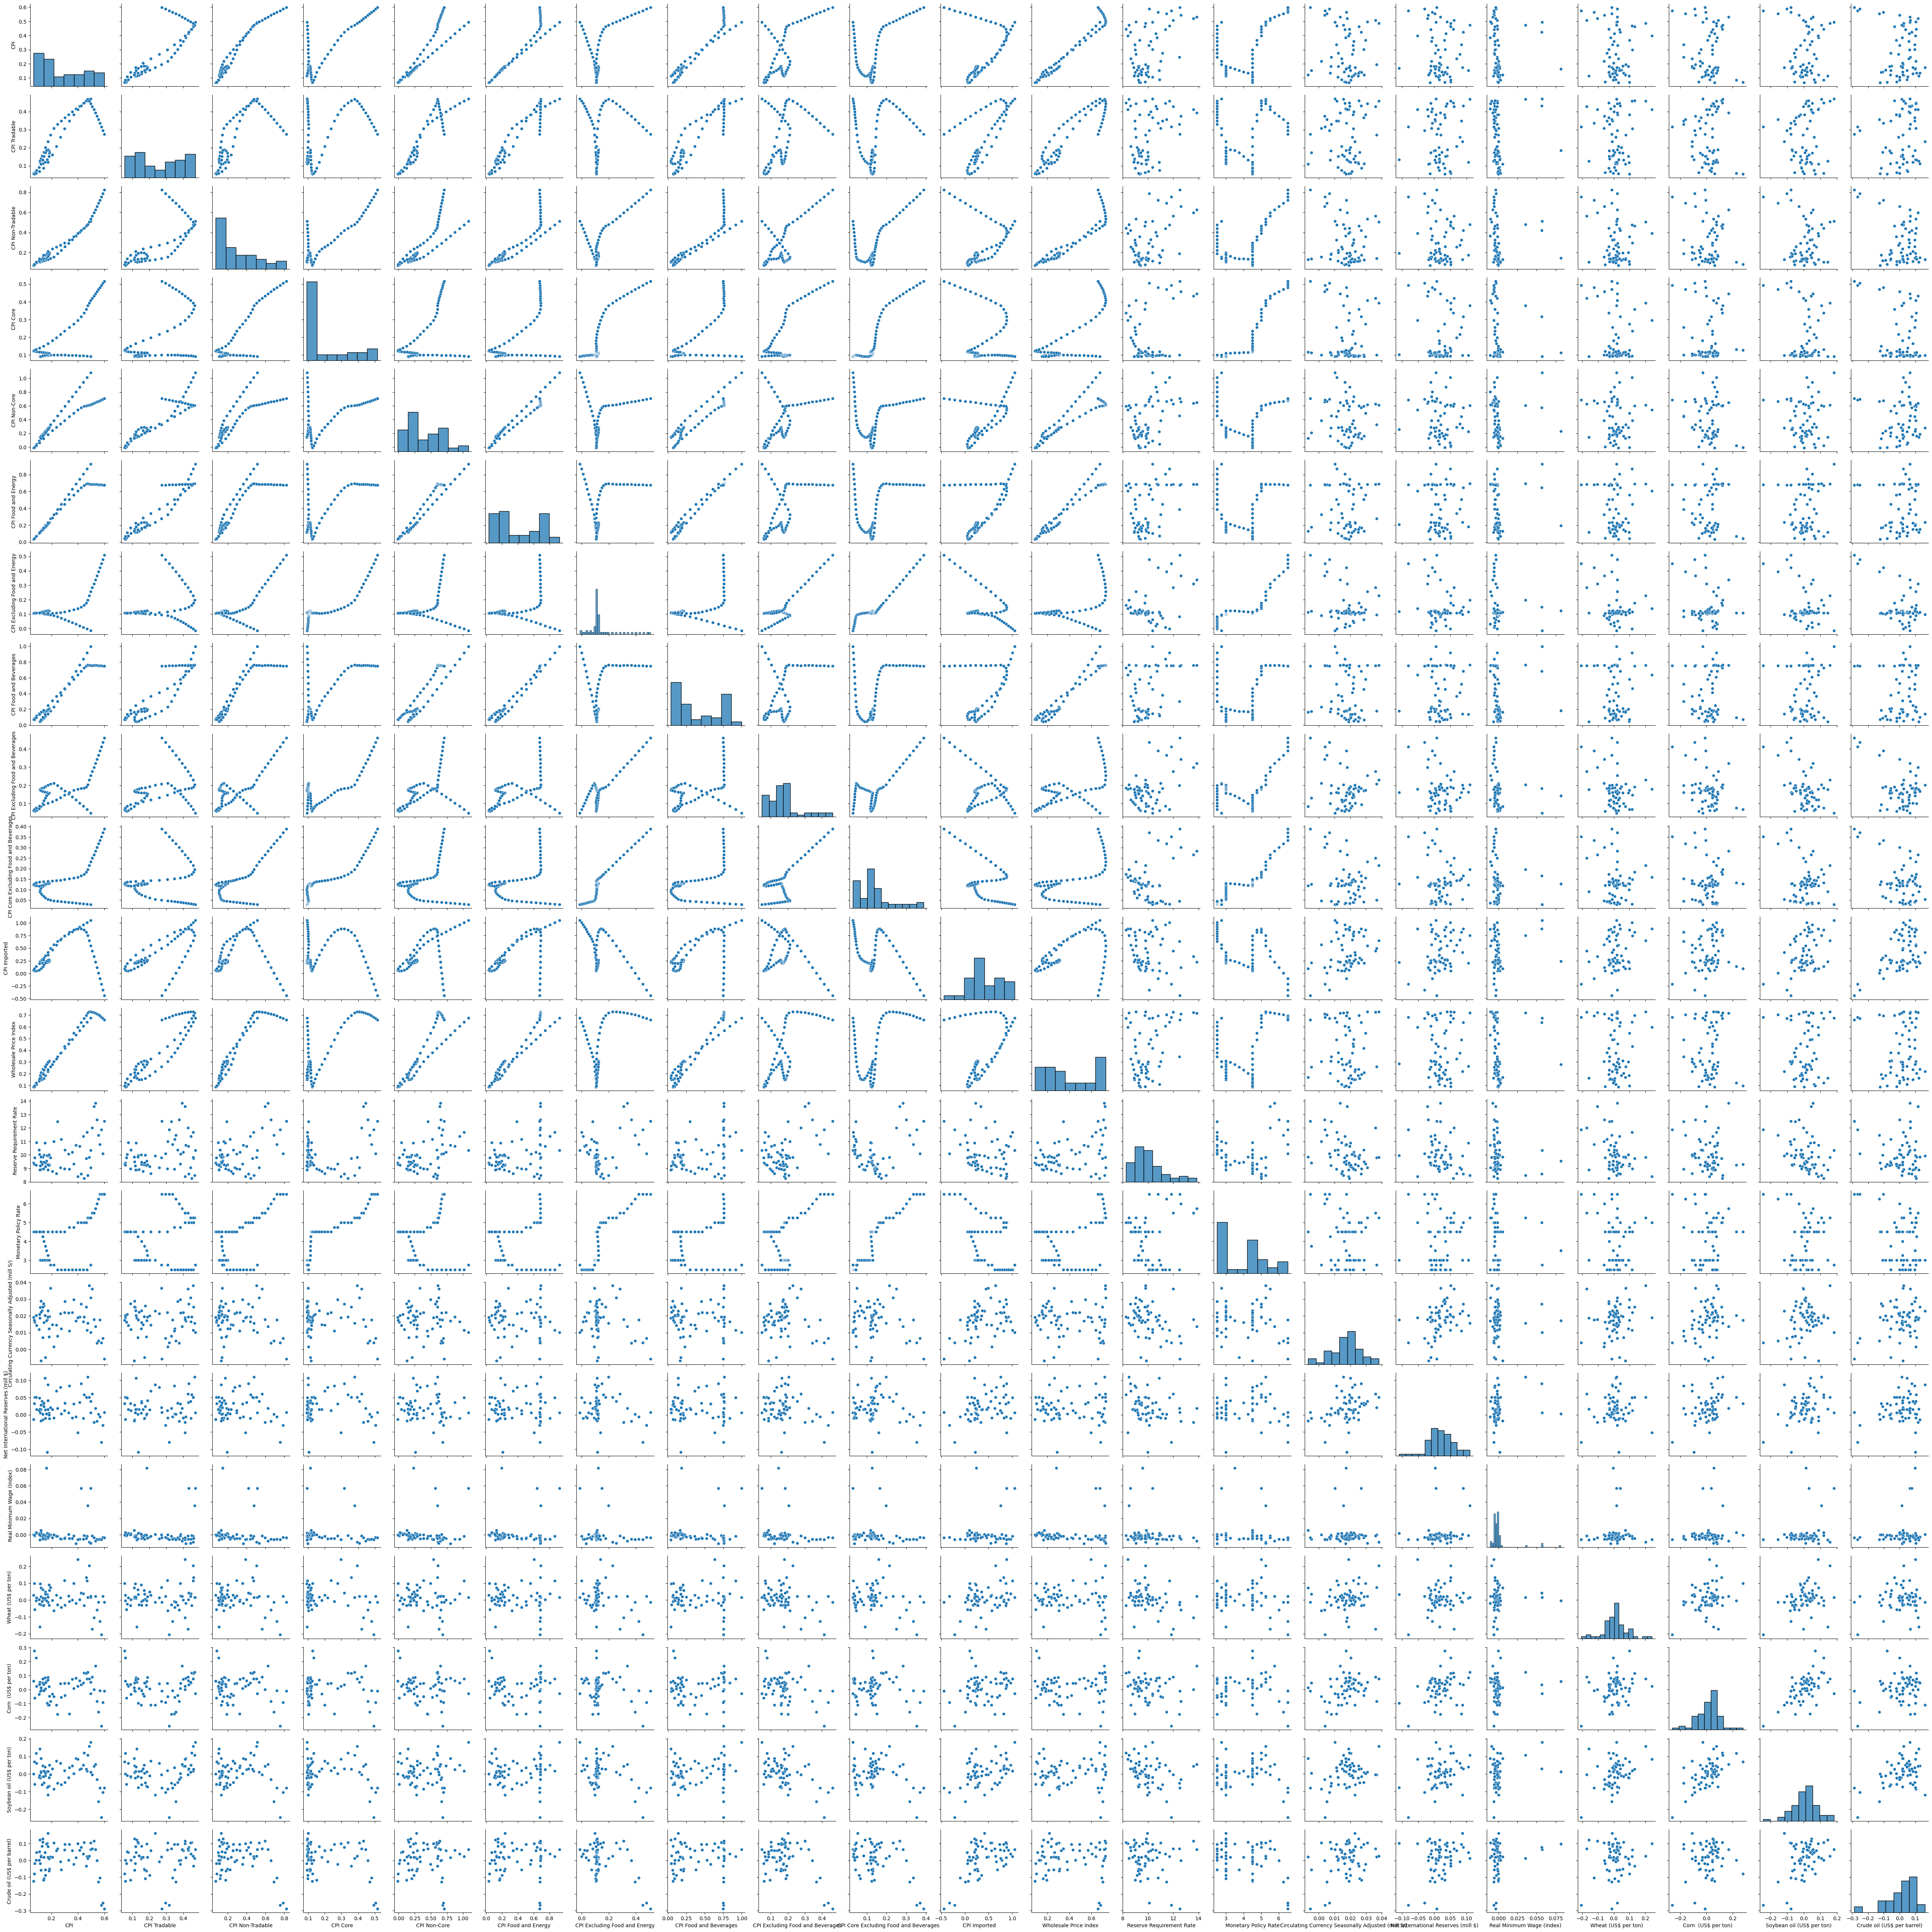

In [12]:
sns.pairplot(df)
plt.tight_layout(pad=1.0)
plt.savefig('../../../output/2_DataVisualization/pairplot_h08.png')

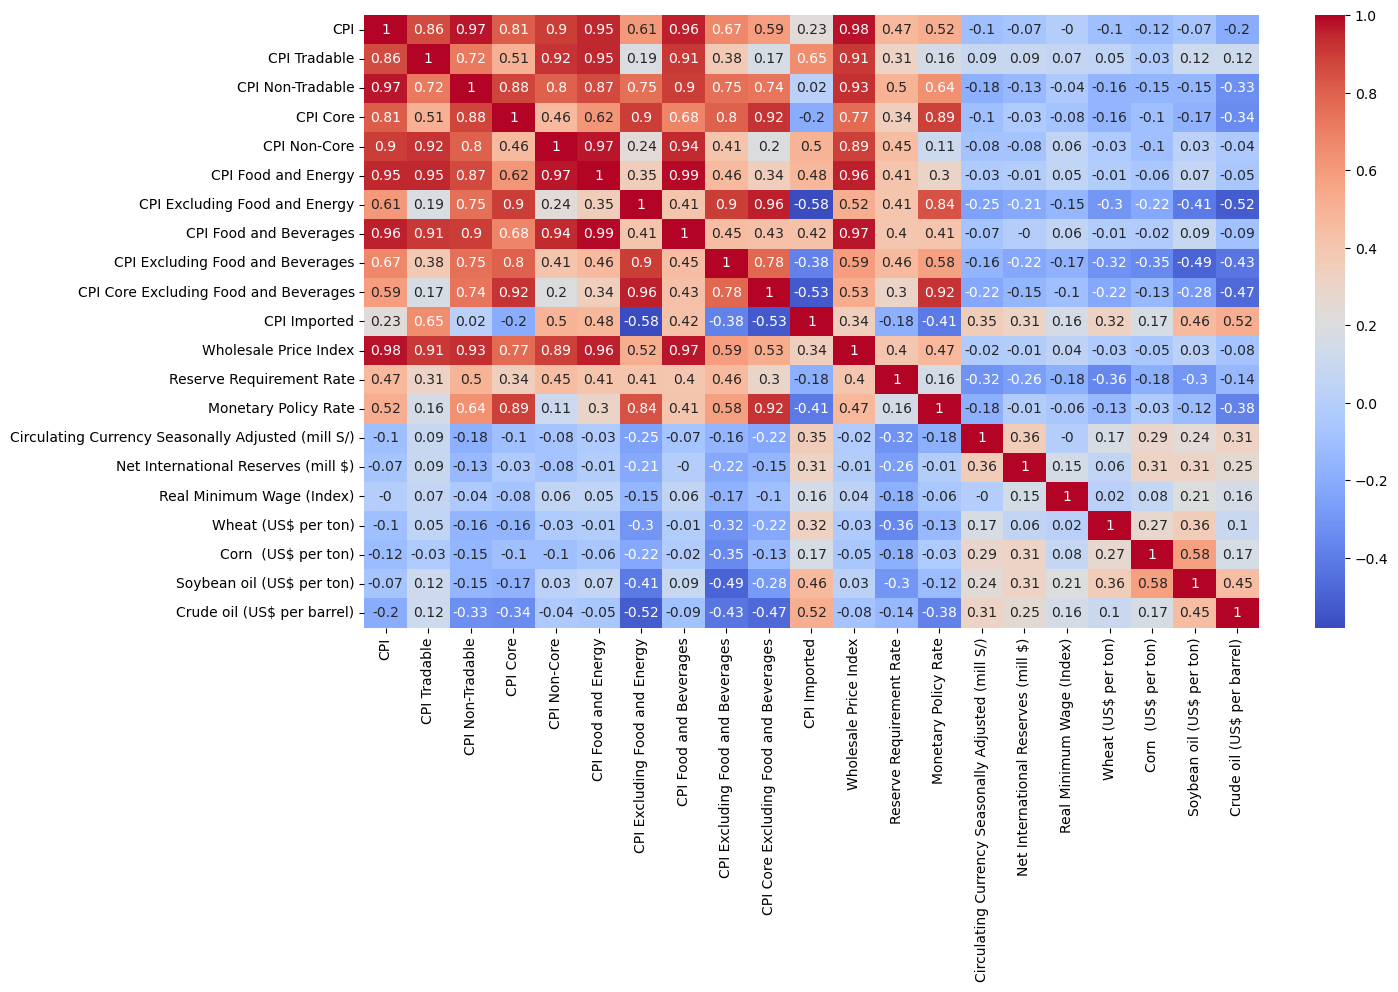

In [13]:
corr = df.corr().round(2)
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.tight_layout(pad=1.0)
plt.savefig('../../../output/2_DataVisualization/heatmap_h08.png')

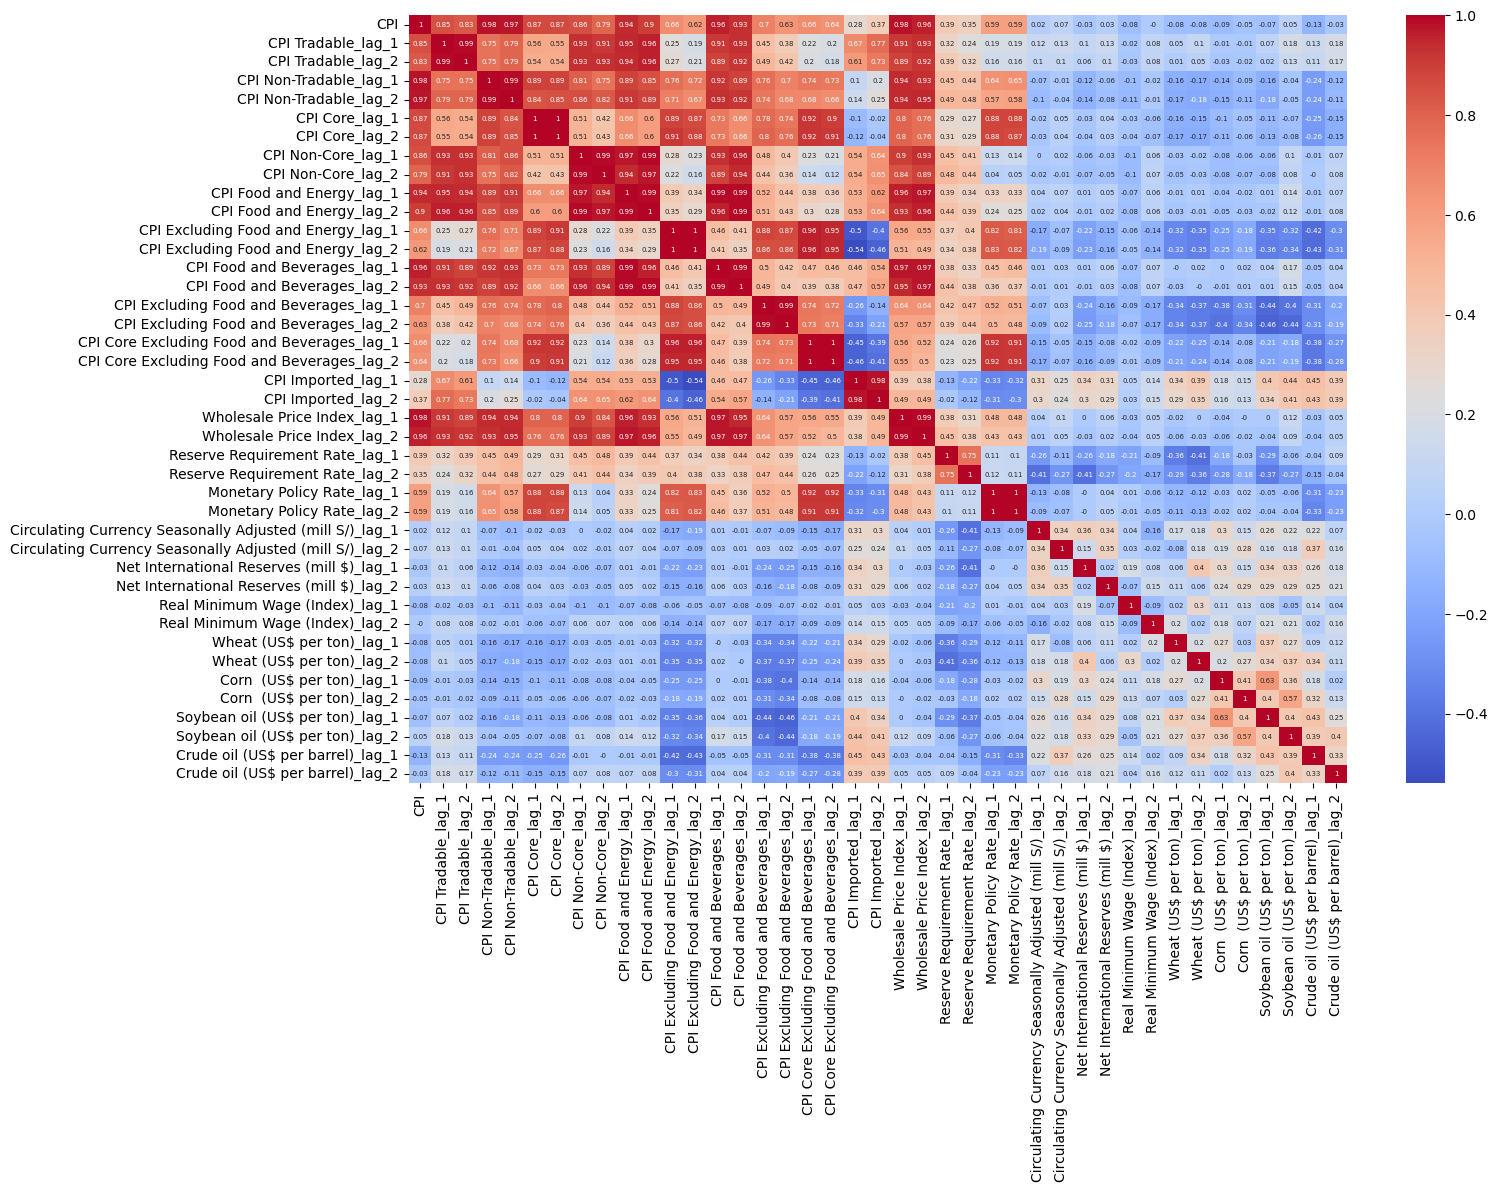

In [14]:
corr = df_lags.corr().round(2)
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm', annot_kws={"size": 5})
plt.tight_layout(pad=1.0)
plt.savefig('../../../output/2_DataVisualization/heatmap_lags_h08.png')